In [3]:
# importing all useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# selecting style for all plots
sns.set_style('whitegrid')

In [5]:
# Reading the input file

df = pd.read_csv("Uber Request Data.csv")

In [6]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Data Cleaning and Preparation

In [7]:
# Checking the data type of Request timestamp as the date time format is varying in rows
df['Request timestamp'].dtype

dtype('O')

In [8]:
# Checking the data type of Drop timestamp as the date time format is varying in rows
df['Drop timestamp'].dtype

dtype('O')

data types for the timestamp columns are in object data types, we need to convert them to proper timestamp format

In [9]:
## Converting the Request timestamp and Drop timestamp from object type to datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

#### Visualizing the data after timestamp conversion

In [10]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
# checking the size of the dataset to know how many requests are there in current dataset.

df.shape

(6745, 6)

#### Visually identify the most pressing problem for Uber

Checking the number of counts for each frequency of requests

In [12]:
df.Status.value_counts(normalize=True)

Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: Status, dtype: float64

Plotting the frequency of requests

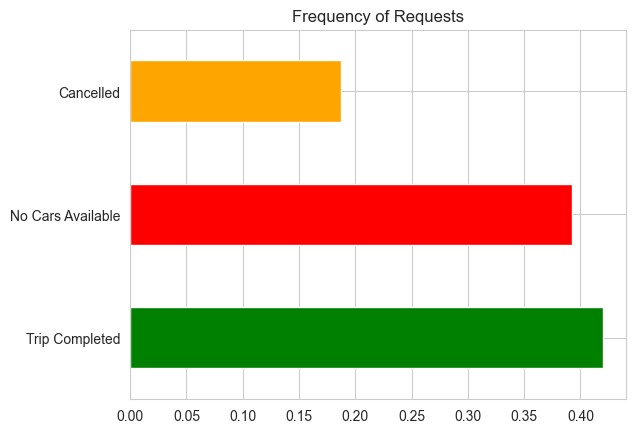

In [13]:
df.Status.value_counts(normalize=True).plot.barh(color=['green','red', 'orange'])
plt.title('Frequency of Requests')
plt.show()

From the bar plot we can infer that only 41% of the total trips are getting completed while 39.29% are not picked up due to no cars availability and remaining 18.84% are cancelled.

#### Analyzing both the problematic requests 'No Cars Available' and 'Cancelled'

Checking the distribution of 'No Cars Available' requests on each pickup points

In [14]:
df[df['Status'] == 'No Cars Available']['Pickup point'].value_counts(normalize=True)

Airport    0.646415
City       0.353585
Name: Pickup point, dtype: float64

Out of 39.29% of trips not getting picked up due to no cars availability 64.64% are from airport and remaining 35.35% are from city.

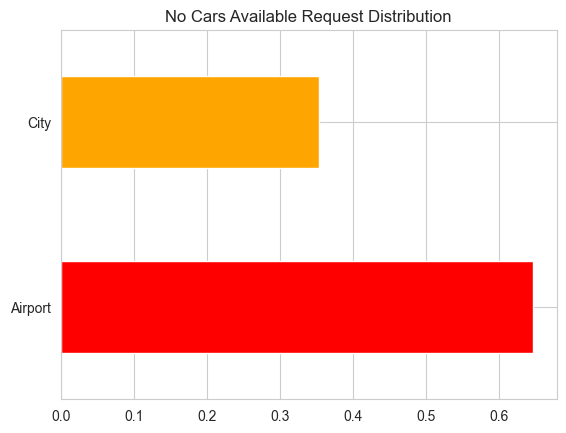

In [15]:
df[df['Status'] == 'No Cars Available']['Pickup point'].value_counts(normalize=True).plot.barh(color=['red', 'orange'])
plt.title('No Cars Available Request Distribution')
plt.show()


from the visualization we can infer that most of the non-availability fo cars request arises from Airport

##### Checking the distribution of 'Cancelled' requests on each pickup points

In [16]:
df[df['Status'] == 'Cancelled']['Pickup point'].value_counts(normalize=True)

City       0.843354
Airport    0.156646
Name: Pickup point, dtype: float64

Out of 18.74% of trips getting cancelled, 84.35% are from city and remaining 15.66% are from airport.

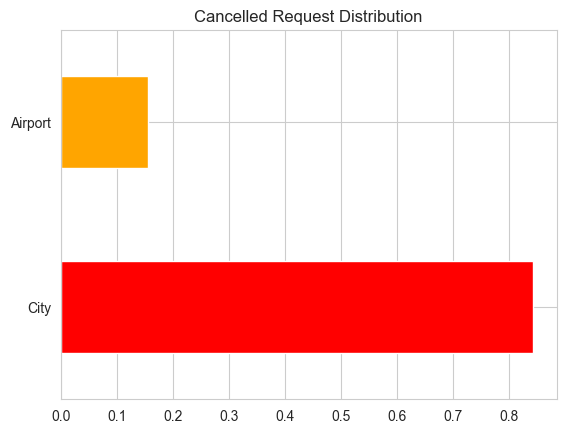

In [17]:
df[df['Status'] == 'Cancelled']['Pickup point'].value_counts(normalize=True).plot.barh(color=['red', 'orange'])
plt.title('Cancelled Request Distribution')
plt.show()

from the visualization we can infer that most the cancelled requests arises from city

#### Checking the frquency of each requests from Airport pickup point

In [18]:
df[df['Pickup point'] == 'Airport']['Status'].value_counts(normalize=True)

No Cars Available    0.529030
Trip Completed       0.409821
Cancelled            0.061149
Name: Status, dtype: float64

Out of of all requests from Airport 52.9% are not picked up due to non-availability of cars
Visualizing this with a bar plot would give better look into it

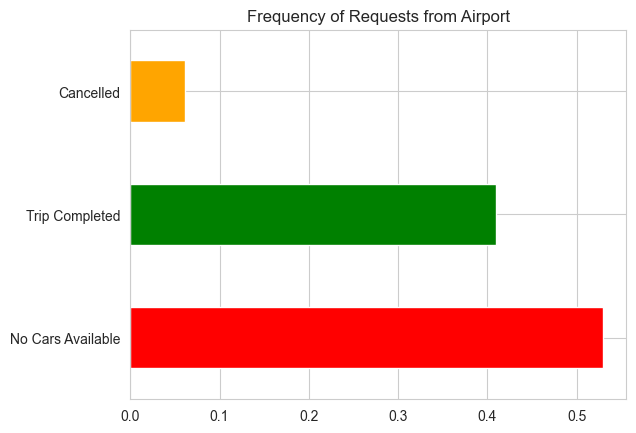

In [19]:
df[df['Pickup point'] == 'Airport']['Status'].value_counts(normalize=True).plot.barh(color=['red', 'green','orange'])
plt.title('Frequency of Requests from Airport')
plt.show()

Most of the trips from Airtport are not getting picked up due to cars non-availability.

#### Checking the frquency of each requests from City pickup point

In [20]:
df[df['Pickup point'] == 'City']['Status'].value_counts(normalize=True)

Trip Completed       0.428857
Cancelled            0.303964
No Cars Available    0.267180
Name: Status, dtype: float64

Out of all requests from City 42.89% are getting completed and 30% are getting cancelled followed by 26.72 are not pickuped up due to non-availability of cars
we can visualize this using a bar plot

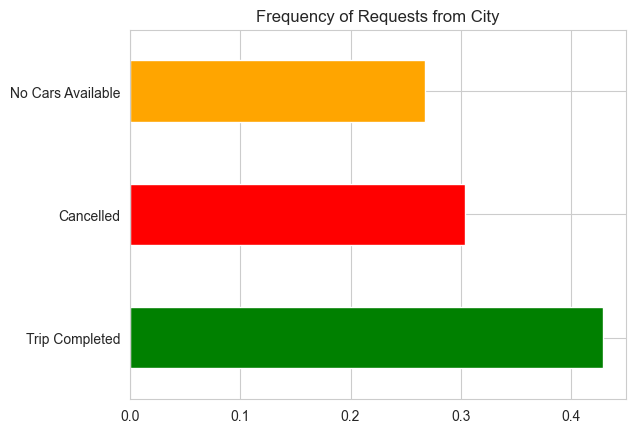

In [21]:
df[df['Pickup point'] == 'City']['Status'].value_counts(normalize=True).plot.barh(color=['green', 'red','orange'])
plt.title('Frequency of Requests from City')
plt.show()

Most of the trips from City are not getting completed, and most problematic request are cancelled ones.

#### Analyzing the request based on time of pickup

Creating a new column of hour of the pickup

In [22]:
df['hour'] = df['Request timestamp'].dt.hour

Visualizing the dataframe

In [23]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


##### Dividing the pickup time in certain time-slots 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late evening', 'Night' and 'Late Night'

In [24]:
df['period'] = pd.cut(df.hour, [0,4,8,12,16,19,21,25], labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening','Late Evening', 'Night'])

Taking a look at the head of the dataframe to after binning the time of the hour

In [25]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,period
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning


##### Checking what period of time slot faces most issues of cars non-availability

In [26]:
df[df['Status'] == 'No Cars Available']['period'].value_counts(normalize=True)

Evening          0.322668
Late Evening     0.213955
Early Morning    0.124518
Late Night       0.093678
Morning          0.089823
Night            0.084426
Afternoon        0.070933
Name: period, dtype: float64

Evenings faces most requests of cars not available for pickup followed by late evening and early morning

Visualizing this result for clarity with bar plot

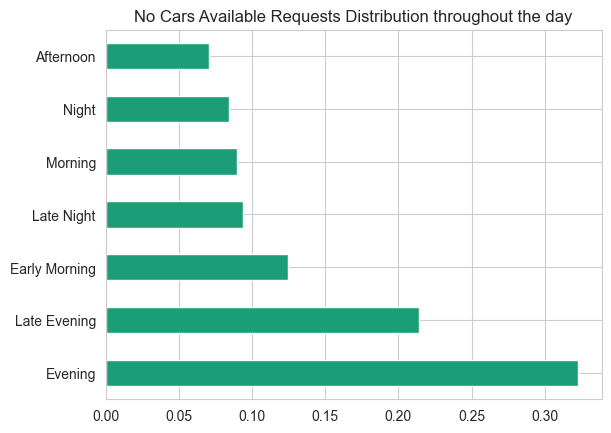

In [27]:
df[df['Status'] == 'No Cars Available']['period'].value_counts(normalize=True).plot.barh(colormap='Dark2')
plt.title('No Cars Available Requests Distribution throughout the day')
plt.show()

##### Evenings faces the most problematic requests of cars not available.

Analyzing what pickup points contirbutes more towards this kind of requests in the evening

In [28]:
# Checking what type of request (Airport-City or City-Airport) face most issue the most problematic time slit i.e. evening

df[(df['period'] == 'Evening') & (df['Status'] == 'No Cars Available')]['Pickup point'].value_counts(normalize=True)

Airport    0.946237
City       0.053763
Name: Pickup point, dtype: float64

Out of all the problematic requests of no cars available in evening, 94.62% are from Airport and rest 5.37% are from City

 Visuazing will give better comparison

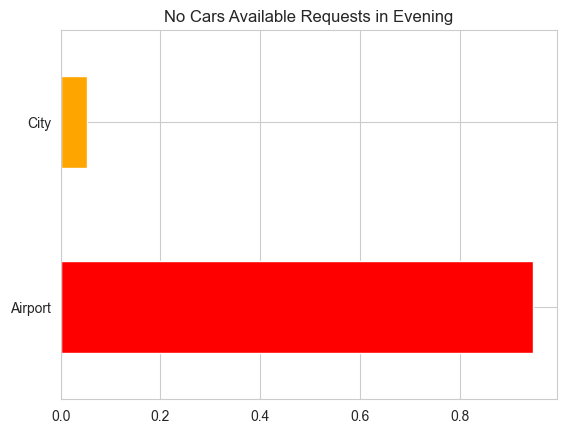

In [29]:
df[(df['period'] == 'Evening') & (df['Status'] == 'No Cars Available')]['Pickup point'].value_counts(normalize=True).plot.barh(color=['red', 'orange'])
plt.title('No Cars Available Requests in Evening')
plt.show()

##### Checking what period of time slot faces most issues of Cancellation

In [30]:
df[df['Status'] == 'Cancelled']['period'].value_counts(normalize=True)

Early Morning    0.529738
Morning          0.214909
Evening          0.065821
Late Evening     0.065821
Afternoon        0.057098
Late Night       0.049167
Night            0.017446
Name: period, dtype: float64

Early Morning faces most cancelled requests for pickup followed by Morning and evening.

Visualizing this result for clarity with bar plot

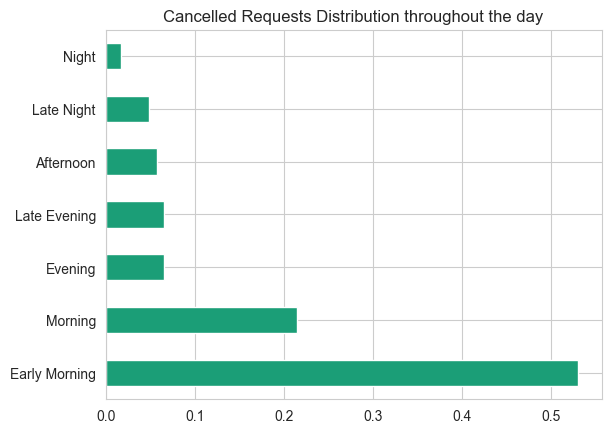

In [31]:
df[df['Status'] == 'Cancelled']['period'].value_counts(normalize=True).plot.barh(colormap='Dark2')
plt.title('Cancelled Requests Distribution throughout the day')
plt.show()

Early Morning faces the most cancelled requests

Analyzing what pickup points contirbutes more towards this kind of requests in the evening

In [32]:
df[(df['period'] == 'Early Morning') & (df['Status'] == 'Cancelled')]['Pickup point'].value_counts(normalize=True)

City       0.977545
Airport    0.022455
Name: Pickup point, dtype: float64

Out of all the cancelled requests in early morning, 97.75% are from City and rest 2.25% are from Airport

 Visuazing will give better comparison

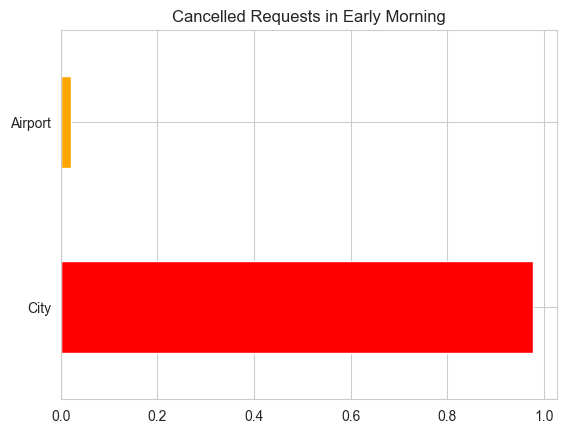

In [33]:
df[(df['period'] == 'Early Morning') & (df['Status'] == 'Cancelled')]['Pickup point'].value_counts(normalize=True).plot.barh(color=['red', 'orange'])
plt.title('Cancelled Requests in Early Morning')
plt.show()

Most severe type of requests are from Airport to City in the evening time. Adding more cars during the evening time nearby airport should solve the problem of unavailability of cars as during the evening time there is a high demand at the Airport and more rides are getting booked and not pickup compared to pickup point at city. So, adding more cars at Airport location or diverting some of the cabs from City to Airpot would be a good idea to solve the demand-supply gap.


#### Analyzing demand and supply

In [34]:
# creating new columns for demand, supply and gap to keep a count

df['demand'] = 1
df['supply'] = df.Status.apply(lambda x: 1 if x == 'Trip Completed' else 0)
df['gap'] = df['demand'] - df['supply']

In [35]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,period,demand,supply,gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,1,1,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1,1,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,1,1,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Late Evening,1,1,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,1,1,0


##### Analyzing demand and supply at each time of the day

In [36]:
# creating pivot table to analyze distribution of demand and supply at each time slot
ds_time = pd.pivot_table(data=df, index = 'period', values=['demand', 'supply', 'gap'], aggfunc=np.sum)

In [37]:
# having a peek at the pivot table
ds_time

,demand,gap,supply
period,,,
Late Night,479,305,174
Early Morning,1672,991,681
Morning,1029,504,525
Afternoon,626,256,370
Evening,1401,920,481
Late Evening,941,638,303
Night,498,241,257


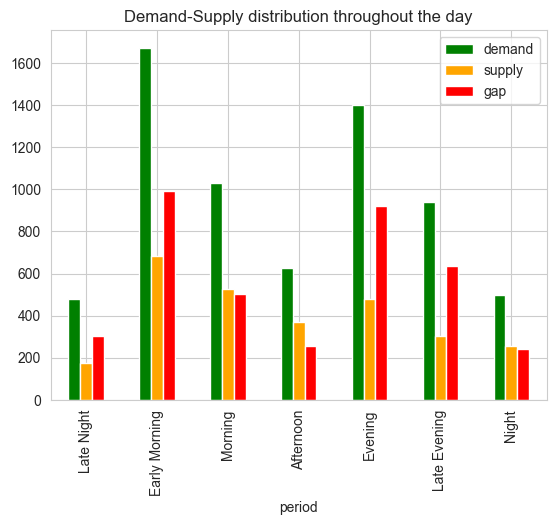

In [38]:
ds_time[['demand','supply','gap']].plot.bar(color=['green', 'orange','red'])
plt.title('Demand-Supply distribution throughout the day')
plt.show()

From the bar chart we can infer that early morning and evenings face the most gaps between demand and supply of cars

##### Analyzing the demand supply distribution in early morning

In [39]:
# creating pivot table for analyzing distribution of requests in early morning
ds_EMorning = pd.pivot_table(data = df[df['period'] == 'Early Morning'], index = 'Pickup point', values = ['demand', 'supply', 'gap'], aggfunc=np.sum)

In [40]:
ds_EMorning

,demand,gap,supply
Pickup point,,,
Airport,337,29,308
City,1335,962,373


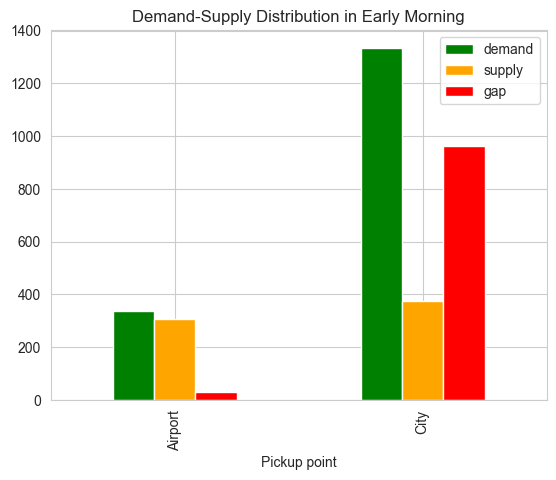

In [41]:
ds_EMorning[['demand','supply','gap']].plot.bar(color=['green', 'orange','red'])
plt.title('Demand-Supply Distribution in Early Morning')
plt.show()

##### Analyzing demand supply distribution in Evening

In [42]:
# creating pivot table for analyzing distribution of requests in early morning
ds_Evening = pd.pivot_table(data = df[df['period'] == 'Evening'], index = 'Pickup point', values = ['demand', 'supply', 'gap'], aggfunc=np.sum)

In [43]:
ds_Evening

,demand,gap,supply
Pickup point,,,
Airport,1079,841,238
City,322,79,243


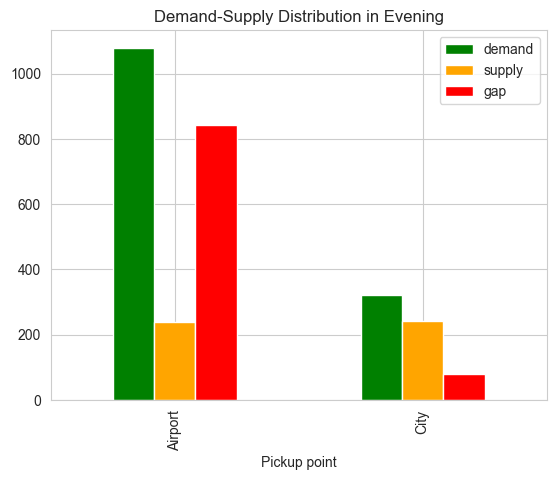

In [44]:
ds_Evening[['demand','supply','gap']].plot.bar(color=['green', 'orange','red'])
plt.title('Demand-Supply Distribution in Evening')
plt.show()

The gap in demand and supply is more in early morning and evening.

In early morning, the gap is more from city whereas in evening the gap is more from airport

In the previous visualization we have seen that in evening most requests from airport are not being picked up due to no cars availability. So, we can infer that the gap in  supply-demand in evening from airport is due to no cars available and gap in supply-demand in early moring from city is due to cancelled requests.